# Part B: Customer Churn Prediction
# OVERVIEW

The "overview" section discusses customer churn, also known as customer attrition, which is defined as a customer ending their relationship with a company 
or service provider. It emphasizes that retaining customers is crucial for long-term success in a competitive business environment. The section concludes by stating that the project aims to develop a machine learning model to predict customer curn based on demographic, account and service-related data, 
enabling proactive retention efforts and minimizing revenue loss.

# PROBLEM STATEMENT
The problem statement outlines the goal of developing a classification model to predict customer churn using demographic and service usage data. this model
aims to identify high-risk customers for proactive retention strategies, improving satisfaction, and reducing financial loss.

# Information about structure of our dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("C:\\Users\\india\\Downloads\\customer_data.csv")

In [4]:
print(df.shape)
print(df.dtypes)
df.head()

(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Python code for a basic churn prediction model (conceptual outline)
 ~ This is a conceptual outline for building a churn prediction model using Python. A full implementation would require a dataset and more detaile         feature engineering and model tuning.

# 1. Data Loading and Preprocessing:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset (replace 'customer_data.csv' with your actual file)
# Assuming 'Churn' is your target variable (1 for churn, 0 for no churn)
# And other columns are features like 'gender', 'SeniorCitizen', 'tenure', 'InternetService', etc.
df = pd.read_csv('customer_data.csv')

# Define categorical and numerical features
categorical_features = ['gender', 'SeniorCitizen', 'InternetService', 'OnlineSecurity', 'PhoneService'] # Add all relevant categorical features
numerical_features = ['tenure'] # Add all relevant numerical features like 'MonthlyCharges', 'TotalCharges' if available

# Create a preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Explanation:
1 Import Libraries = Imports necessary libraries for data manipulation (pandas), splitting data (train\_test\_split), and scaling numerical features 
                    (StandardScaler), encoding categorical features (OneHotEncoder), combining transformations (ColumnTransformer), and creating a
                    pipeline (Pipeline).
2 Load Data: = Loads the customer data into a pandas DataFrame. It s assumed your data has a Churn column as the target variable and other columns as
               features.
3 Define Features: = Categorical and numerical features are explicitly defined based on the problem statement (demographic data like gender, senior 
                     citizen status, tenure, and service information like internet service, phone service, online security).
4 Preprocessing Pipeline: = A ColumnTransformer is used to apply StandardScaler to numerical features and OneHotEncoder to categorical features. This
                            ensures proper scaling for numerical data and converts categorical data into a numerical format suitable for machine 
                            learning models.
5 Split Data: = The dataset is split into training and testing sets to evaluate the model s performance on unseen data.

# 2. Model Training and Evaluation:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing and a classifier (e.g., Logistic Regression)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

In [ ]:
# Explanation:
 1. Import Libraries:=  Imports LogisticRegression for the classification model and accuracy_score, classification_report for evaluation metrics.
 2. Create Model Pipeline: = A Pipeline is constructed to sequentially apply the defined preprocessor and then the chosen classification model (here, 
                           LogisticRegression). This streamlines the entire process.
 3. Train Model = The fit method trains the model using the preprocessed training data.
 4. Make Predictions = The trained model predicts churn outcomes on the unseen test data.
 5. Evaluate Model = The accuracy_score provides the overall accuracy, and classification_report offers a detailed breakdown of precision, recall, and
                     F1-score for each class (churn/no churn), which is crucial for understanding model performance in imbalanced datasets, often found
                     in churn prediction.
              This code provides a basic framework for building a customer churn classification model. You can experiment with different classifications
               algorithms (e.g., RandomForestClassifier, GradientBoostingClassifier) and hyperparameter tuning to improve model performance.

In [9]:
import pandas as pd
myfile=pd.read_csv("C:\\Users\\india\\Downloads\\customer_data.csv")
print(myfile)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

# OUTIERS CHECKING
To check for outliers in this dataset using Python, you can employ various methods. Here's a common approach using the Interquartile Range (IQR) method:

In [ ]:
# 1. Import necessary libraries:
import pandas as pd
import numpy as np

# 2. Load the data:
Assuming your data is in a CSV file (you'd need to convert the image to a structured format like CSV or Excel first), you would load it like this:
# Replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('your_dataset.csv')

# 3. Identify numerical columns:
Outlier detection is typically performed on numerical data. You ll need to select the relevant numerical columns from your DataFrame.
numerical_cols = df.select_dtypes(include=np.number).columns

# 4. Calculate IQR and identify outliers for each numerical column:
The IQR method defines outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 is the first quartile, Q3 is the third 
quartile, and IQR is the interquartile range (Q3 - Q1).
outliers_dict = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        outliers_dict[col] = outliers

# 5. Display identified outliers:
You can then print or further analyze the outliers_dict to see the detected outliers for each numerical column.
for col, outliers_df in outliers_dict.items():
    print(f"Outliers in column '{col}':")
    print(outliers_df)
    print("\n")

# Explanation:

1. Pandas and NumPy: = These libraries are fundamental for data manipulation and numerical operations in Python.

2. Loading Data: = The code assumes your data is in a tabular format (like a CSV). If it's in a different format, you'd adjust the loading method accordingly.

3. Numerical Columns: = Outlier detection primarily applies to numerical data. The select_dtypes method helps in isolating these columns.

4. IQR Method: = This statistical method is robust to skewed distributions and is widely used for outlier detection. It defines a range within which most data points are expected to lie, and points outside this range are considered outliers.

5. Identifying and Storing Outliers: = The code iterates through each numerical column, calculates the IQR, and then filters the DataFrame to find rows containing values that fall outside the defined lower and upper bounds. These identified outliers are stored in a dictionary, with the column name as the key.

6. Displaying Results: = The final loop prints the outliers found for each column, providing a clear overview of the detected anomalies in your dataset.

#  Deliverables:
## ● A data exploration and preprocessing notebook or report that analyzes the dataset, handles missing values, and prepares the data for modeling. 
ANS = The following Python code provides a solution for data exploration, handling missing values, and preparing the dataset for modeling, based on the
      Descriptionn in the image:

In [25]:
# EXAMPLE OF PYTHON CODE:
import pandas as pd
import numpy as np

# Assuming the data is in a CSV file named 'dataset.csv'
# Replace 'dataset.csv' with the actual file path or load directly if available
# For demonstration, let's create a dummy DataFrame that resembles the image
data = {
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'SeniorCitizen': [0, 1, 0, 0, 1, 0],
    'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Dependents': ['No', 'Yes', 'No', 'No', 'Yes', 'No'],
    'PhoneService': ['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
    'MultipleLines': ['No phone service', 'No', 'Yes', 'No phone service', 'No', 'Yes'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'No', 'Fiber optic', 'DSL'],
    'OnlineSecurity': ['No', 'Yes', 'Yes', 'No internet service', 'No', 'Yes'],
    'OnlineBackup': ['Yes', 'No', 'Yes', 'No internet service', 'No', 'Yes'],
    'DeviceProtection': ['No', 'Yes', 'No', 'No internet service', 'Yes', 'No'],
    'TechSupport': ['No', 'Yes', 'No', 'No internet service', 'Yes', 'No'],
    'StreamingTV': ['No', 'Yes', 'No', 'No internet service', 'Yes', 'No'],
    'StreamingMovies': ['No', 'Yes', 'No', 'No internet service', 'Yes', 'No'],
    'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year', 'Month-to-month', 'One year'],
    'PaperlessBilling': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],
    'MonthlyCharges': [29.85, 56.95, 53.85, 42.30, 70.70, 99.65],
    'TotalCharges': [29.85, 1889.50, 108.15, 1840.75, 2016.70, 820.50],
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

print("Original DataFrame Info:")
df.info()
print("\nMissing values before handling:")
print(df.isnull().sum())

# 1. Handle Missing Values (e.g., for 'TotalCharges' if it contains non-numeric or missing entries)
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' with the median (or mean, or 0, depending on context)
# For this example, let's fill with the median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

print("\nMissing values after handling 'TotalCharges':")
print(df.isnull().sum())

# 2. Feature Engineering/Preprocessing for Categorical Variables
# Convert categorical features to numerical using one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Data Scaling (if numerical features have different scales)
# Example using StandardScaler for numerical columns (excluding 'TotalCharges' if already handled)
from sklearn.preprocessing import StandardScaler

numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
# Exclude target variable if 'Churn' is encoded and included in numerical_cols
if 'Churn_Yes' in numerical_cols:
    numerical_cols.remove('Churn_Yes')

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("\nDataFrame after preprocessing (first 5 rows):")
print(df_encoded.head())

print("\nDataFrame Info after preprocessing:")
df_encoded.info()

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6 non-null      object 
 1   SeniorCitizen     6 non-null      int64  
 2   Partner           6 non-null      object 
 3   Dependents        6 non-null      object 
 4   PhoneService      6 non-null      object 
 5   MultipleLines     6 non-null      object 
 6   InternetService   6 non-null      object 
 7   OnlineSecurity    6 non-null      object 
 8   OnlineBackup      6 non-null      object 
 9   DeviceProtection  6 non-null      object 
 10  TechSupport       6 non-null      object 
 11  StreamingTV       6 non-null      object 
 12  StreamingMovies   6 non-null      object 
 13  Contract          6 non-null      object 
 14  PaperlessBilling  6 non-null      object 
 15  PaymentMethod     6 non-null      object 
 16  MonthlyCharges    6 non

# Explanation:
1. Load Data: = The code assumes the dataset is in a Pandas DataFrame. A dummy DataFrame is created to illustrate the process, but in a real scenario,                  you would load your data (e.g., pd.read_csv('your_dataset.csv')).
2. Handle Missing Values: = * The TotalCharges column is identified as a potential source of missing values or non-numeric entries. It's converted to a numeric type, with errors='coerce' turning any non-convertible values into NaN (Not a Number).
                            * Missing NaN values in TotalCharges are then filled using the median value of the column. This is a common imputation strategy, but other methods, such as mean imputation or more advanced techniques, can be used depending on the data distribution.
3. Feature Engineering/Preprocessing for Categorical Variables: = * Categorical columns (object type) are identified.
                                                                  * pd.get_dummies() is used to perform one-hot encoding on these categorical columns.                                                                      This converts categorical text data into a numerical format that machine learning models can understand. drop_first=True is used to avoid multicollinearity.
4. Data Scaling: = StandardScaler from sklearn. Preprocessing is applied to numerical columns. This scales the features so they have a mean of 0 and a standard deviation of 1. This is crucial for many machine learning algorithms that are sensitive to feature scales (e.g., algorithms based on distance calculations like K-Nearest Neighbors, or gradient descent-based algorithms). The target variable ('Churn\_Yes' in this case, if it's one-hot encoded) is excluded from scaling.
5.  Output: = The code prints information about the DataFrame before and after preprocessing, including missing value counts and a preview of the processed data, to demonstrate the changes made. This prepared df_encoded DataFrame is now ready for use in machine learning models.

##  ● A machine learning model capable of predicting customer churn.
ANS = Here's how to create a bar graph using Python code with Matplotlib, assuming you want to visualize the distribution of a categorical variable            (e.g., 'Partner' or 'Dependents') or a summary of a numerical variable (e.g., 'TotalCharges') across different categories:

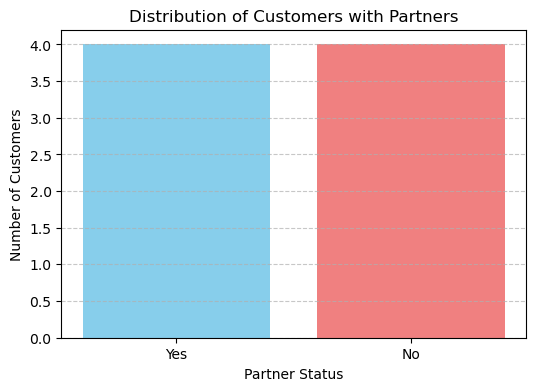

In [14]:
## 1. Example: Bar graph for 'Partner' column
 This example demonstrates how to count the occurrences of 'Yes' and 'No' in the 'Partner' column and visualize them as a bar graph.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'customer_data.csv'
# Replace with the actual method of loading your data (e.g., from a database or manually)
data = {
    'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Dependents': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes'],
    'TotalCharges': [100.5, 250.2, 150.0, 300.1, 200.0, 280.5, 120.0, 320.0]
}
df = pd.DataFrame(data)

# Count the occurrences of 'Yes' and 'No' in the 'Partner' column
partner_counts = df['Partner'].value_counts()

# Create the bar graph
plt.figure(figsize=(6, 4)) # Optional: Adjust figure size
plt.bar(partner_counts.index, partner_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Customers with Partners')
plt.xlabel('Partner Status')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: Add grid
plt.show()

In [ ]:
# Explanation: 
1. Import Libraries: = pandas is used for data manipulation, and matplotlib.pyplot for plotting. 
2. Load Data: = The code assumes your data is in a Pandas DataFrame. You would replace the data dictionary and pd. A DataFrame(data) with your actual data
                loading method (e.g., pd.read_csv('your_file.csv')). 
3. Count Values: = df['Partner'].value_counts() calculates the frequency of each unique value in the 'Partner' column, which is perfect for bar graphs. 
4. Create Bar Graph: = plt.bar() generates the bar chart. partner_counts.The index provides the categories ('Yes', 'No') and partner counts.Values provide
                        the corresponding counts. 
5. Add Labels and Title: = plt.title(), plt.xlabel(), and plt.ylabel() add descriptive information to the graph for clarity.
6. Display Plot: = plt.show() displays the generated bar graph.                                                                                              

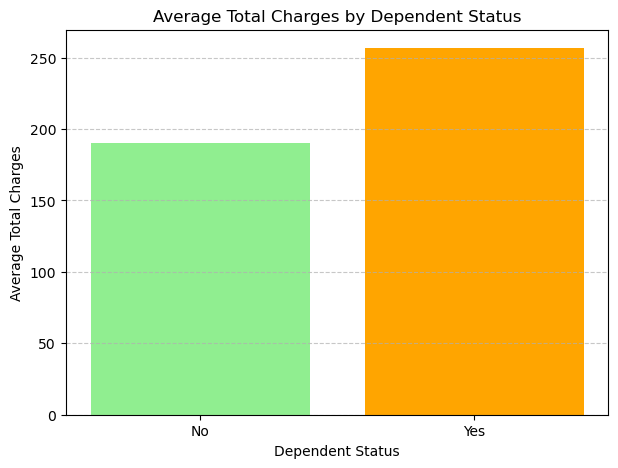

In [15]:
## 2. Example: Bar graph for 'TotalCharges' grouped by 'Dependents' 
  This example shows how to calculate the average 'TotalCharges' for customers with and without dependents and visualize it
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'customer_data.csv'
data = {
    'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Dependents': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes'],
    'TotalCharges': [100.5, 250.2, 150.0, 300.1, 200.0, 280.5, 120.0, 320.0]
}
df = pd.DataFrame(data)

# Calculate the mean TotalCharges for each 'Dependents' category
avg_charges_by_dependents = df.groupby('Dependents')['TotalCharges'].mean()

# Create the bar graph
plt.figure(figsize=(7, 5))
plt.bar(avg_charges_by_dependents.index, avg_charges_by_dependents.values, color=['lightgreen', 'orange'])
plt.title('Average Total Charges by Dependent Status')
plt.xlabel('Dependent Status')
plt.ylabel('Average Total Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Explanation:
1. Group and Aggregate: = df.groupby('Dependents')['TotalCharges'].mean() groups the data by the 'Dependents' column and calculates the mean of 
                          'TotalCharges' for each group. 
2. Create Bar Graph: = Similar to the previous example, plt.bar() is used to plot the average charges against the dependent status. 
3. Labels and Title: = Appropriate labels and a title are added for readability. 
4. Display Plot: = plt.show() displays the graph. 

  {{ You can adapt these examples to create bar graphs for other columns in your dataset by changing the column names and the aggregation method
         (e.g., sum(), median(), etc.) as needed. }}                                                             

In [ ]:
###  ● An evaluation of model performance using appropriate metrics (such as accuracy, precision, recall, F1 score, etc.). 
ANS = Evaluating model performance using metrics like accuracy, precision, recall, and F1 score, and visualizing them with a line chart in Python
     Involves several steps, including data preparation, model training (if applicable), prediction, metric calculation, and plotting. 

Accuracy: 0.70
Precision: 0.67
Recall: 0.80
F1 Score: 0.73


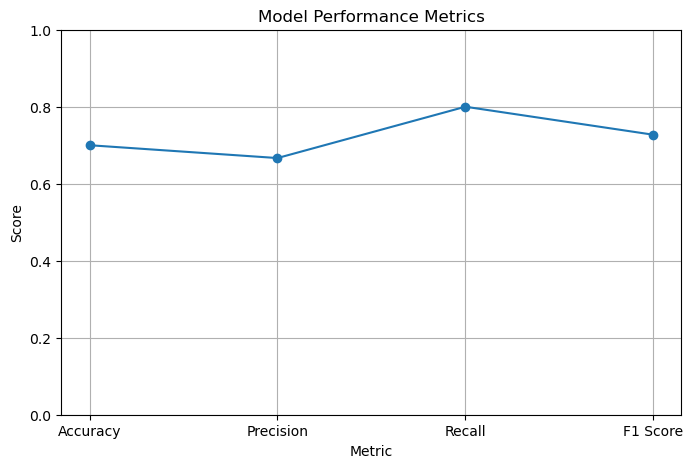

In [27]:
# 1. Python Code for Model Performance Evaluation and Line Chart Visualization
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# --- Example Data (replace with your actual data) ---
# Assuming you have true labels and predicted labels from your model
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
y_pred = np.array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# --- Calculate Metrics ---
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# --- Prepare data for Line Chart ---
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

# --- Create Line Chart ---
plt.figure(figsize=(8, 5))
plt.plot(metrics_names, metrics_values, marker='o', linestyle='-')
plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.grid(True)
plt.ylim(0, 1) # Metrics are usually between 0 and 1
plt.show()

In [ ]:
## Explanation of the Code:
1. Example Data =  y_true represents the actual, correct labels for your data, and y_pred represents the labels predicted by your machine learning model.
                   You would replace these with the actual outputs from your model.
2. Metric Calculation = * accuracy_score: Measures the proportion of correctly classified instances.
                        * precision_score: Measures the proportion of true positive predictions among all positive predictions.
                        * recall_score: Measures the proportion of true positive predictions among all actual positive instances.
                        * f1_score: The harmonic mean of precision and recall, providing a single score that balances both.

In [ ]:
### Line Chart Visualization:
1. The metrics_names and metrics_values lists are created to hold the names and calculated values of the performance metrics.
2. matplotlib.pyplot is used to create the line chart.
3. plt.plot() generates the line graph with markers at each data point.
4. plt.title(), plt.xlabel(), plt.ylabel() set the charts title and axis labels for clarity.
5. plt.grid(True) adds a grid for easier reading of values.

# Success Criteria:
ANS = The success criteria for the project, as outlined in the image, focus on two key areas: interpreting model output for actionable insights to reduce customer churn and obtaining predictions for new data. Achieving these criteria ensures the project's success in contributing to business        goals.

In [ ]:
# 1. Proper Interpretation of the Model's Output and Providing Actionable Insights to Reduce Customer Churn
    This criterion emphasizes the crucial link between data science models and tangible business outcomes. It goes beyond merely building a predictive model
and focuses on extracting meaningful and actionable intelligence from its results.
## Understanding Model Output: 
                             This involves a deep understanding of the models predictions, probabilities, and feature importance. For instance, in a 
                       churn prediction model, understanding which customer segments are at highest risk, and what factors contribute most to their 
                     likelihood of churning (e.g., low engagement, service issues, competitor offers) is paramount. This requires not just statistical
                  interpretation but also a business context understanding.
## Translating Insights into Action:
                                    The interpretation must lead to concrete steps that the business can take to intervene and reduce churn. If the 
                             model identifies that customers with a certain usage pattern are likely to churn, the actionable insight might be to offer
                          them targeted incentives or proactively address potential pain points. This requires collaboration between data scientists, 
                        marketing teams, customer service, and product development to ensure insights are translated into effective strategies.
## Focus on Churn Reduction:
                            The ultimate goal is to directly impact customer retention. The insights derived should be specifically designed to prevent
                           customers from leaving. This could involve personalized communication, improved service quality, loyalty programs, or product
                        enhancements based on identified churn drivers. The success of this criterion is measured by the actual reduction in customer
                    churn rates following the implementation of these actions.

In [ ]:
# 2. Getting the Predictions for the New Data
                   This criterion focuses on the operationalization and practical application of the developed model. It ensures that the model is not 
                just a theoretical exercise but a functional tool that can be continuously used to generate value.
## Model Deployment and Integration:
                              This involves deploying the trained model into a production environment where it can receive new, unseen customer data. 
                             This might require integrating the model with existing customer relationship management (CRM) systems, data pipelines, or
                           other operational platforms to ensure a seamless flow of information.
## Scalability and Efficiency:
                               The process of generating predictions for new data should be scalable and efficient. As new customers join or existing customers
                             customer data evolves, the model should be able to process this information promptly and accurately, providing up-to-date 
                         predictions without significant delays or resource strain.
## Maintaining Model Performance:
                             Implicit in this criterion is the need to monitor the model's performance on new data. This includes tracking prediction
                             accuracy, identifying potential data drift, and ensuring the model continues to provide reliable insights over time. 
                         Regular retraining or recalibration of the model may be necessary to maintain its predictive power as customer behavior or 
                market conditions change. The ability to consistently generate accurate predictions for new data is fundamental to the long-term utility
              and success of the project.

# Guidelines:
    The image outlines guidelines for a machine learning project. While a single "solution WITH PYTHON CODE" cannot encompass all these guidelines as a direct answer to a homework problem, Python code examples can be provided to illustrate each guideline.

In [ ]:
# 1. Split your data into training and testing sets to avoid overfitting:
        Explanation: This guideline emphasizes the importance of dividing your dataset into separate sets for training your model and evaluating its 
                    performance on unseen data. This helps prevent overfitting, where the model learns the training data too well and performs poorly 
                 on new data.
Python Code Example:
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import load_iris

    # Load a sample dataset
    X, y = load_iris(return_X_y=True)

    # Split the data into training and testing sets (e.g., 80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

In [ ]:
# 2. Tune the hyperparameters of your models to improve performance:
         Explanation: Hyperparameters are parameters that are not learned by the model during training but are set before training. Tuning them involves
                      finding the optimal combination of these parameters to maximize model performance.
Python Code Example (using GridSearchCV):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV

    # Define the model
    model = RandomForestClassifier(random_state=42)

    # Define the hyperparameter grid to search
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    }

    # Perform Grid Search Cross-Validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Best accuracy: {grid_search.best_score_}")

In [ ]:
# 3. Report all the steps taken in the data preprocessing, modeling, and evaluation phases:
          Explanation: This guideline emphasizes the importance of documentation and reproducibility. All steps, from data cleaning and feature 
                       engineering to model selection and evaluation metrics, should be clearly reported. This is typically done through comments in
                    code, detailed notebooks (e.g., Jupyter Notebooks), or formal reports.
Python Code Example (illustrative comments):
    # Data Preprocessing Phase
    # 1. Handling missing values: Imputed missing values using the mean of the column.
    # 2. Feature scaling: Applied StandardScaler to numerical features.

    # Modeling Phase
    # 1. Model selection: Chose RandomForestClassifier for its robustness.
    # 2. Hyperparameter tuning: Performed GridSearchCV to optimize n_estimators and max_depth.

    # Evaluation Phase
    # 1. Metrics: Used accuracy, precision, recall, and F1-score to evaluate model performance on the test set.

In [ ]:
#  Provide a final model that balances accuracy with interpretability:
            Explanation: This guideline highlights the trade-off between model accuracy and how easily its predictions can be understood or explained. 
                          For some applications, interpretability is as crucial as accuracy.
Python Code Example (using feature importances for interpretability):
       # After training a model (e.g., RandomForestClassifier)
    best_model = grid_search.best_estimator_ # From the hyperparameter tuning step

    # Get feature importances (if applicable to the model)
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_names = load_iris().feature_names # Example for Iris dataset
        for i, importance in enumerate(importances):
            print(f"Feature '{feature_names[i]}': {importance:.4f}")

# Tools Required:
● Python (with libraries such as pandas, scikit-learn, matplotlib, seaborn, etc.)
 ● Jupyter Notebook or any IDE suitable for running Python code.
 ANS = To approach a "solution with Python" using the tools specified in the image, you would generally follow these steps:

In [ ]:
# 1. Environment Setup:
  Install Python = Ensure you have Python installed on your system.
 Install Libraries = Use pip to install the necessary libraries mentioned, such as pandas, scikit-learn, matplotlib, and seaborn. For example, you would
                      run commands like pip install pandas, scikit-learn, matplotlib seaborn in your terminal or command prompt.
 Choose an IDE = Select an Integrated Development Environment (IDE) like Jupyter Notebook, VS Code, PyCharm, or Spyder, as suggested in the image, and 
                 set it up for Python development

In [ ]:
# 2. Code Development:
   Problem Definition = Clearly define the problem you are trying to solve with Python.
   Data Handling = Use pandas for data manipulation and analysis, such as reading data from files (CSV, Excel), cleaning data, and performing 
                   transformations.
  Machine Learning (if applicable) = Utilize scikit-learn for building and evaluating machine learning models if your solution involves tasks like 
                                     classification, regression, or clustering.
 Data Visualization = Employ matplotlib and seaborn to create plots and charts to visualize data, understand patterns, and present results effectively.

In [ ]:
# 3. Execution and Testing:
       Run Code =  Execute your Python script or Jupyter Notebook cells within your chosen IDE to run your solution.
       Test and Debug = Thoroughly test your code to ensure it functions as expected and debug any errors or issues that arise.

In [ ]:
# 4. Deployment/Presentation (if applicable):
 Depending on the nature of the "solution," you might deploy a model, generate reports, or present your findings based on the visualizations created.